In [18]:
import pandas as pd
import sqlite3 as sql


import scipy.stats as stats
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# DB file
db_file = '../sqlite_immigration_italienne.sqlite'


# create a connection
cn = sql.connect(db_file)


In [2]:
query="""
SELECT pk_personne, person, genre, periode, partie_b, classement_calcule 
FROM v_mention_domicile_metier_periode;
"""

In [4]:
# Create a cursor
cur = cn.cursor()
cur.execute(query)
# La méthode 'fetchall' permet de récupérer toutes les lignes
r = cur.fetchall()

In [6]:
personnes = pd.DataFrame(r)
personnes.columns=['pk_personne', 'nom', 'genre', 'periode', 'adresse', 'metier']
personnes.tail()

,pk_personne,nom,genre,periode,adresse,metier
525,33,Vuattoux Joseph,homme,1848_1854,Clavequin,atelier artisanal
526,361,Zanoletti Battista,homme,1855_1860,Puits 17,entreprise de construction
527,184,Zanone Jean,homme,1855_1860,Gibraltar 45,usine
528,184,Zanone Jean,homme,1855_1860,Combe 41,usine
529,283,Zenone Giovanni,homme,1861_1870,Léopold Robert 5,usine


In [21]:
def bivariee_stats(D):
    ### Valeurs produites par la fonction de la librairie 'stats'
    statistic, p, dof, expected = stats.chi2_contingency(D)

    print('Chi2 :', statistic.round(2), ', dof :',dof)
    print('p-value :', p)


    # print('phi2 = inertie (variance totale) :', statistic/n)


    ### Tableau à l'indépendance
    dfe = round(pd.DataFrame(expected),4)

    ### Coéfficient de Cramer
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html

    vc = stats.contingency.association(D, method='cramer')
    print('Cramer: ', vc)

    ### Situation à l'indépendance
    indep = pd.DataFrame(expected)
    indep.columns = D.columns
    indep.index = D.index

    ### Résidus pondérés (avec le signe)
    ### Doc. :
    #   Rakotomalala, p.240
    residus_ponderes = (round((D-indep)/np.sqrt(indep),2))
    ### Résidus pondérés
    tableau = residus_ponderes

    fig, ax = plt.subplots(figsize=(9,3))         
    # Sample figsize in inches
    g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
    xlabels = tableau.columns
    px = g.set_xticklabels(xlabels, rotation=60, size=8, 
                           ha='right', rotation_mode='anchor')
    ylabels = tableau.index
    py = g.set_yticklabels(ylabels, rotation=20, size=8)
    
    plt.show()

### Métier - époque

In [15]:


### Tableau de contingence
X = "periode"
Y = "metier"  # "0"

ddf = personnes[[X,Y]].pivot_table(index=Y,columns=X,observed=True, aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int).transpose()
ddf = ddf[:-1]
ddf



metier,agriculture,atelier artisanal,carrière,chemin de fer,commerce,domicile,enseignement,entreprise de construction,horlogerie,magasin,pension,service,service artistique,textile,usine,usine de gaz,Total
periode,,,,,,,,,,,,,,,,,
1848_1854,0,35,0,0,12,14,0,65,16,13,0,0,1,3,20,0,179
1855_1860,1,25,0,2,11,11,0,50,11,19,2,1,1,6,31,1,172
1861_1870,0,17,5,1,6,9,1,64,7,16,2,0,3,10,21,5,167
Error,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [16]:
D = ddf.iloc[:3, [1,4, 5, 7, 8, 9, 13,14]].copy(deep=True)
D

metier,atelier artisanal,commerce,domicile,entreprise de construction,horlogerie,magasin,textile,usine
periode,,,,,,,,
1848_1854,35,12,14,65,16,13,3,20
1855_1860,25,11,11,50,11,19,6,31
1861_1870,17,6,9,64,7,16,10,21


Chi2 : 21.32 , dof : 14
p-value : 0.09382033899160638
Cramer:  0.1471799194436081


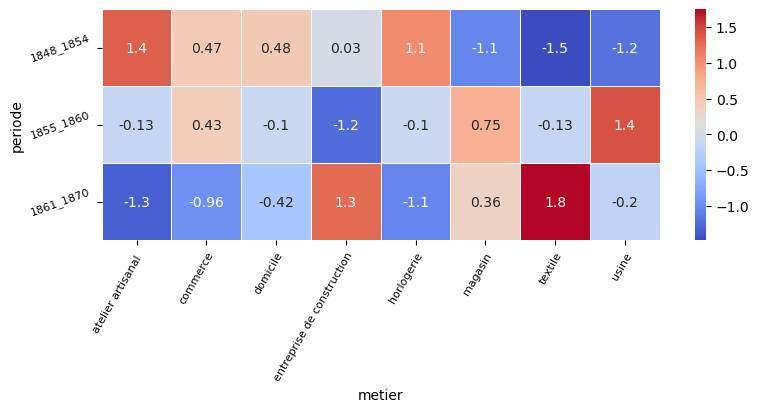

In [22]:
bivariee_stats(D)

Il n'y a pas de corrélation significative, p-value > 0.05 mais légères tendances visibles

### Genre - métier

In [23]:


### Tableau de contingence
X = "genre"
Y = "metier"  # "0"

ddf = personnes[[X,Y]].pivot_table(index=Y,columns=X,observed=True, aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int).transpose()
ddf = ddf[:-1]
ddf



metier,agriculture,atelier artisanal,carrière,chemin de fer,commerce,domicile,enseignement,entreprise de construction,horlogerie,magasin,pension,service,service artistique,textile,usine,usine de gaz,Total
genre,,,,,,,,,,,,,,,,,
femme,1,9,0,0,0,12,0,0,4,12,4,0,0,4,1,0,47
homme,0,68,5,3,29,22,1,180,30,36,0,1,5,15,71,6,472


In [24]:
D = ddf.iloc[:, [1,4, 5, 7, 8, 9, 13,14]].copy(deep=True)
D

metier,atelier artisanal,commerce,domicile,entreprise de construction,horlogerie,magasin,textile,usine
genre,,,,,,,,
femme,9,0,12,0,4,12,4,1
homme,68,29,22,180,30,36,15,71


Chi2 : 77.45 , dof : 7
p-value : 4.564606067716722e-14
Cramer:  0.39634692258343657


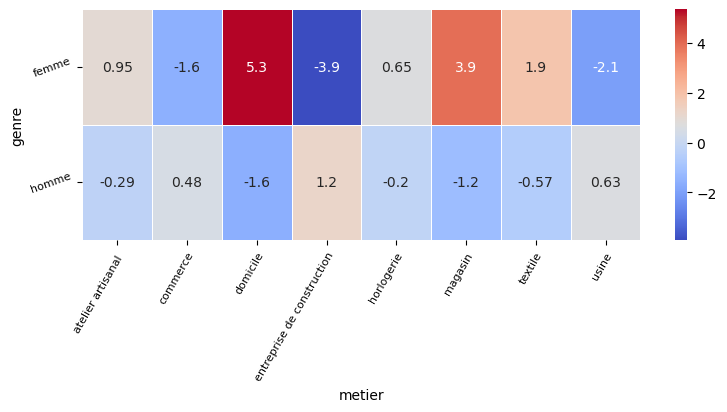

In [25]:
bivariee_stats(D)